<a href="https://colab.research.google.com/github/niemand-01/ML-Demo/blob/master/RNN_Tensorflow_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.layers import *

In [3]:
import matplotlib.pyplot as plt


In [5]:
# dataset
dataset,info = tfds.load('imdb_reviews/subwords8k',with_info=True,as_supervised=True)
train_dataset,test_dataset = dataset['train'],dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteA4QG2C/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteA4QG2C/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteA4QG2C/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


# Text Tokenizer with Encoder 

In [7]:
encoder = info.features['text'].encoder
print('vocalbulary size:{}'.format(encoder.vocab_size))

vocalbulary size:8185


In [10]:
sample_string = 'Hello TensorFlow.'
encoded_string = encoder.encode(sample_string)
print('Encoded string is{}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('Original string is {}'.format(original_string))

assert original_string == sample_string
for index in encoded_string:
  print('{} -- &gt;{}'.format(index,encoder.decode([index])))

Encoded string is[4025, 222, 6307, 2327, 4043, 2120, 7975]
Original string is Hello TensorFlow.
4025 -- &gt;Hell
222 -- &gt;o 
6307 -- &gt;Ten
2327 -- &gt;sor
4043 -- &gt;Fl
2120 -- &gt;ow
7975 -- &gt;.


# Prepare Data

In [36]:
BUFFER_SIZE = 10000
BATCH_SIZE = 20

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)

test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [37]:
# 建立迭代器，并进行迭代操作（把data从DatasetV1Adapter格式转化为tensor格式）
for element in train_dataset:
  print(element)
  break

# 每个element里面有2个array,
# 第一个shape(7,64,64,3944) 存放评论的话，已经encoded，
  # 其中3944是每句话的长度
  # 7，64，64是相对应的句子个数

# 第二个(7,64,64)，应该是相对应的Label（1 good/0 bad）


(<tf.Tensor: shape=(1, 1, 7, 64, 64, 3944), dtype=int64, numpy=
array([[[[[[ 147,    1, 2572, ...,    0,    0,    0],
           [  62,   27,    9, ...,    0,    0,    0],
           [  62,   27,   80, ...,    0,    0,    0],
           ...,
           [1455,  715, 1717, ...,    0,    0,    0],
           [  12,  284,   14, ...,    0,    0,    0],
           [2829,   37, 2923, ...,    0,    0,    0]],

          [[ 147,    1,  577, ...,    0,    0,    0],
           [  12,  258,   33, ...,    0,    0,    0],
           [8002, 7968,  111, ...,    0,    0,    0],
           ...,
           [1504, 4202, 7968, ...,    0,    0,    0],
           [  12,  270,   15, ...,    0,    0,    0],
           [  12,  321,   14, ...,    0,    0,    0]],

          [[  12, 1167, 7968, ...,    0,    0,    0],
           [ 128,   14,    9, ...,    0,    0,    0],
           [1333,  763,  786, ...,    0,    0,    0],
           ...,
           [ 160, 3336, 8029, ...,    0,    0,    0],
           [  12,  1

# Model

In [16]:
model = tf.keras.Sequential([
      Embedding(encoder.vocab_size,64),
      Bidirectional(LSTM(64)),
      Dense(64,activation='relu'),
      Dense(1)
])

LEARNING_RATE =1e-4

In [17]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    metrics=['accuracy']
)

histroy = model.fit(train_dataset,epochs=10,validation_data=test_dataset,validation_steps=30)

Epoch 1/10
391/391 [==============================] - 804s 2s/step - loss: 0.6592 - accuracy: 0.5415 - val_loss: 0.4615 - val_accuracy: 0.7984
Epoch 2/10
391/391 [==============================] - 812s 2s/step - loss: 0.3501 - accuracy: 0.8507 - val_loss: 0.3373 - val_accuracy: 0.8568
Epoch 3/10
391/391 [==============================] - 816s 2s/step - loss: 0.2552 - accuracy: 0.8991 - val_loss: 0.3189 - val_accuracy: 0.8677
Epoch 4/10
391/391 [==============================] - 830s 2s/step - loss: 0.2091 - accuracy: 0.9215 - val_loss: 0.3173 - val_accuracy: 0.8719
Epoch 5/10
391/391 [==============================] - 820s 2s/step - loss: 0.1806 - accuracy: 0.9350 - val_loss: 0.3413 - val_accuracy: 0.8693
Epoch 6/10
391/391 [==============================] - 803s 2s/step - loss: 0.1639 - accuracy: 0.9406 - val_loss: 0.3759 - val_accuracy: 0.8667
Epoch 7/10
391/391 [==============================] - 813s 2s/step - loss: 0.1448 - accuracy: 0.9484 - val_loss: 0.3702 - val_accuracy: 0.8646

# Evaluation

391/391 [==============================] - 170s 434ms/step - loss: 0.4555 - accuracy: 0.8538
Test Loss:0.4555361270904541
Test Accuracy


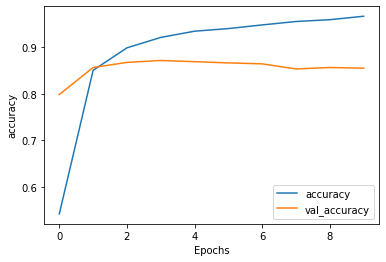

In [19]:
test_loss,test_acc = model.evaluate(test_dataset)
print('Test Loss:{}'.format(test_loss))
print('Test Accuracy'.format(test_acc))


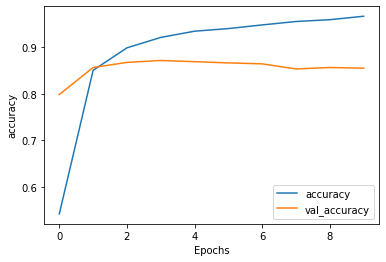

In [21]:
def plot_graphs(history,metric):
  plt.plot(history.history[metric])
  plt.plot(history.history["val_"+metric],'')
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend([metric,'val_'+metric])
  plt.show()

plot_graphs(histroy,'accuracy')

# Prediction

In [40]:
def pad_to_size(vec,size):
  zeros = [0]*(size-len(vec))
  vec.extend(zeros)
  return vec

def sample_predict(sample_pred_text,pad):
  encoded_sample = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample = pad_to_size(encoded_sample,64)
  encoded_sample = tf.cast(encoded_sample,tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample,0))
  return predictions

In [41]:
# predict on a smaple text without padding
sample_pred_text_bad = ('The movie was not good. I would not recommend')
predictions = sample_predict(sample_pred_text_bad,pad=False)
print(predictions)

predictions = sample_predict(sample_pred_text_bad,pad=True)
print(predictions)

sample_pred_text_good = ('The movie was pretty good. I would like to recommend')
predictions = sample_predict(sample_pred_text_good,pad=True)
print(predictions)

[[-0.3601454]]
[[-0.42699867]]
[[0.2791087]]
